In [1]:
import sys
from importlib import reload 
sys.path.append('../hdssm_story/lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [31]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances_wips(for_ranking, k=3):
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("wips",
                           scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_2(for_ranking=True, k=3):
    n = "triple_trainable_l1_sq_ex_corrected" if for_ranking else "triple_trainable_l1_sq_ex"
    return [
        ProductDistances([
            (10, Distances(n, scalable=True))
        ], "sum")
        for _ in range(k)
    ]

_____________


In [8]:
!ls ../datasets

3d_sphere_triang_120.edges   clique_4.edges		  graph.clusters
3d_sphere_triang_1920.edges  clique_5.edges		  karate.edges
3d_sphere_triang_30.edges    conflict.edges		  polblogs.edges
3d_sphere_triang_480.edges   cora			  polbooks.edges
airport.edges		     CSPhDs.edges		  power.edges
bg_20_700_0.05.edges	     cycle_100.edges		  reactome.edges
bipartite_100.edges	     cycle_5.edges		  smalltree.edges
bipartite_5.edges	     dolphins.edges		  star_100.edges
ca-cit-HepTh.edges	     eu-core.edges		  star_5.edges
Ca-HelpTh.edges		     eu-core-no-self-loops.edges  tree_3_6.edges
chicago.edges		     euroroad.edges		  usca312.edges
citeseer		     EuroSiS.edges		  wla6.edges
clique_100.edges	     facebook.edges		  wla6.nodes
clique_12.edges		     football.edges


In [11]:
G, distances_matrix, r_matrix  = utils.get_dataset("CSPhDs.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/CSPhDs.edges
|V| = 1025, |E| = 1043


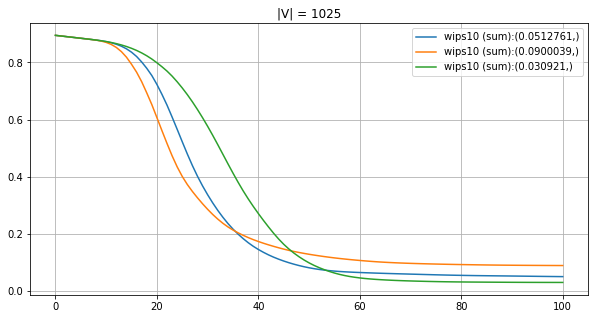

0.0512761	wips10 (sum)
0.0900039	wips10 (sum)
0.030921	wips10 (sum)
0.001 	->	 0.05740033333333333 0.02450614812033004
=====
0.0517516 0.007622517086019989
0.035791833333333335 0.004399041290503598
0.05078743333333333 0.0135324985680973
0.05740033333333333 0.02450614812033004


In [12]:
L = list()
for lr in [0.1, 0.05, 0.01, 0.001]:
    story = utils.estimate_signatures_distortion(
        make_model_2, qs, distances_matrix, r_matrix,
        make_distances_wips(False, 3), 2000, learning_rate=lr,
        loss_eval_interval=20, draw_interval=20,
        different_d_sum=True, print_results=True
    )
    vs = np.array(story)[:, -1, 0]
    L.append(vs)
    print(lr, "\t->\t", vs.mean(), vs.std())
print("=====")
for L_i in L:
    print(L_i.mean(), L_i.std())

In [13]:
_, distances_matrix = utils.get_dataset("usca312")

d = make_model()
qs = d.sparse_arange(312)  # queries
# r_matrix = 1 * (distances_matrix <= 1.001)  ## BUGS EVERYWHERE
distances_matrix.shape

dm_copy = np.copy(distances_matrix)
r_matrix = np.copy(distances_matrix)

for i in range(dm_copy.shape[0]):
    dm_copy[i].sort()
    r_matrix[i] = distances_matrix[i] <= dm_copy[i, 1] + 1e-3
r_matrix -= np.eye(r_matrix.shape[0])

Loading from ../datasets/usca312.edges


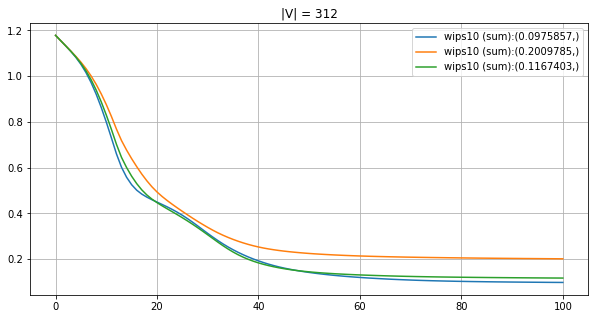

0.0975857	wips10 (sum)
0.2009785	wips10 (sum)
0.1167403	wips10 (sum)
0.001 	->	 0.13843483333333334 0.04491107773792812
=====
0.10125216666666666 0.0039051216603612025
0.12603896666666667 0.044940125820053314
0.06468163333333334 0.017767802122065884
0.13843483333333334 0.04491107773792812


In [14]:
L = list()
for lr in [0.1, 0.05, 0.01, 0.001]:
    story = utils.estimate_signatures_distortion(
        make_model_2, qs, distances_matrix, r_matrix,
        make_distances_wips(False, 3), 2000, learning_rate=lr,
        loss_eval_interval=20, draw_interval=20,
        different_d_sum=True, print_results=True
    )
    vs = np.array(story)[:, -1, 0]
    L.append(vs)
    print(lr, "\t->\t", vs.mean(), vs.std())
print("=====")
for L_i in L:
    print(L_i.mean(), L_i.std())

In [15]:
G, distances_matrix, r_matrix  = utils.get_dataset("power", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/power.edges
|V| = 4941, |E| = 6594


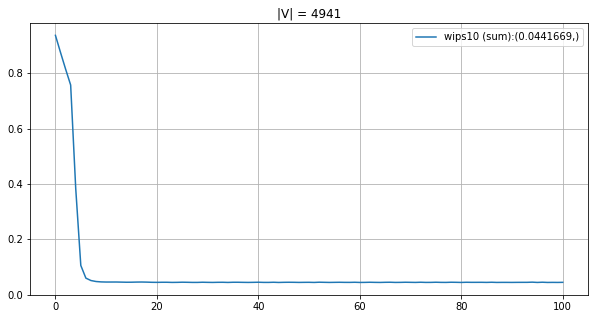

0.0441669	wips10 (sum)
0.1 	->	 0.0441669 0.0


In [17]:
story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances_wips(False, 1), 2000, learning_rate=0.05,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)
vs = np.array(story)[:, -1, 0]
print(lr, "\t->\t", vs.mean(), vs.std())

In [32]:
G, distances_matrix, r_matrix  = utils.get_dataset("facebook", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/facebook.edges
|V| = 4039, |E| = 88234


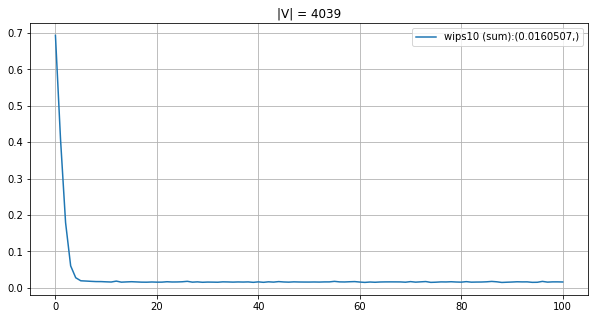

0.0160507	wips10 (sum)
0.1 	->	 0.0160507 0.0


In [19]:
story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances_wips(False, 1), 2000, learning_rate=0.05,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)
vs = np.array(story)[:, -1, 0]
print(lr, "\t->\t", vs.mean(), vs.std())

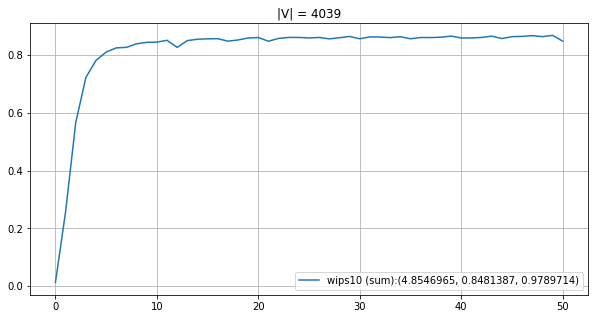

0.8481387	wips10 (sum)
0.1 	->	 0.8481387 0.0


In [34]:
story = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances_wips(True, 1), iters=1000, learning_rate=0.05,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

vs = np.array(story)[:, -1, 1]
print(lr, "\t->\t", vs.mean(), vs.std())

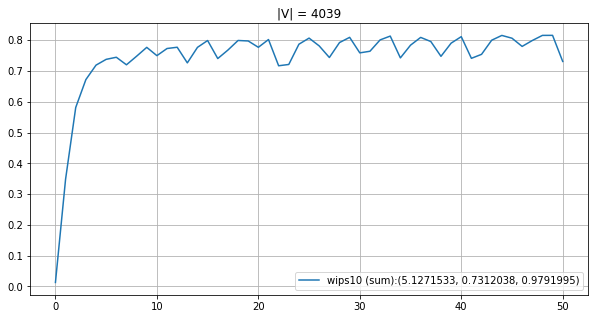

0.7312038	wips10 (sum)
0.1 	->	 0.7312038 0.0


In [35]:
story = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances_wips(True, 1), iters=1000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

vs = np.array(story)[:, -1, 1]
print(lr, "\t->\t", vs.mean(), vs.std())

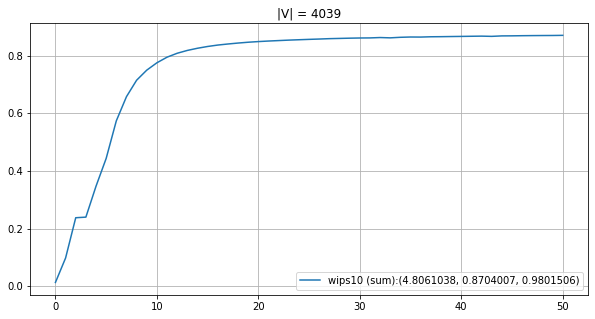

0.8704007	wips10 (sum)
0.1 	->	 0.8704007 0.0


In [37]:
story = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances_wips(True, 1), iters=1000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

vs = np.array(story)[:, -1, 1]
print(lr, "\t->\t", vs.mean(), vs.std())

In [39]:
G, distances_matrix, r_matrix  = utils.get_dataset("wla6.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/wla6.edges
|V| = 3227, |E| = 3604


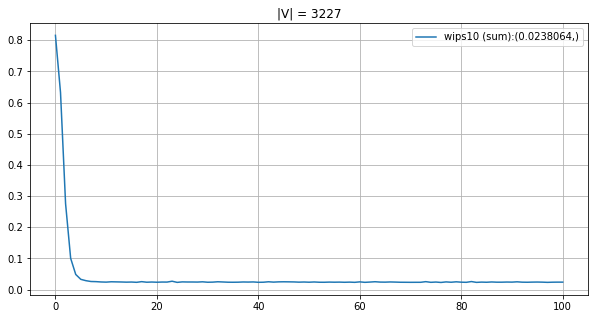

0.0238064	wips10 (sum)
0.1 	->	 0.0238064 0.0


In [21]:
story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances_wips(False, 1), 2000, learning_rate=0.05,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)
vs = np.array(story)[:, -1, 0]
print(lr, "\t->\t", vs.mean(), vs.std())

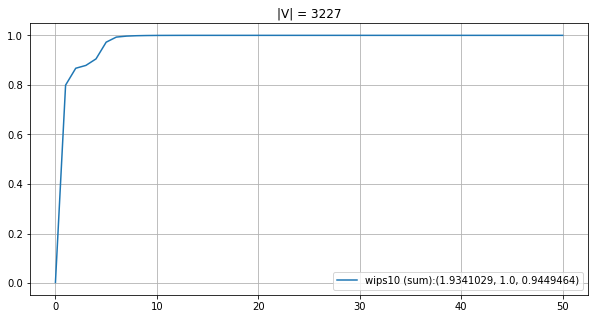

1.0	wips10 (sum)
0.1 	->	 1.0 0.0


In [40]:
story = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances_wips(True, 1), iters=1000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

vs = np.array(story)[:, -1, 1]
print(lr, "\t->\t", vs.mean(), vs.std())

In [26]:
G, distances_matrix, r_matrix  = utils.get_dataset("eu-core.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/eu-core.edges
|V| = 986, |E| = 16687


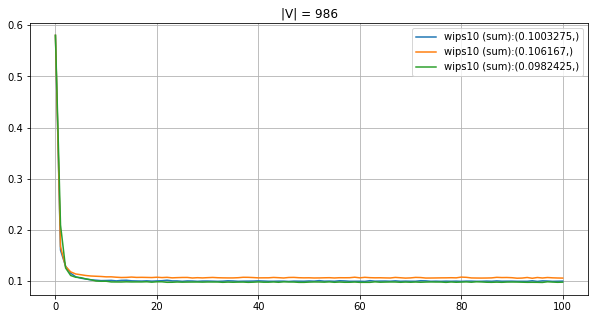

0.1003275	wips10 (sum)
0.106167	wips10 (sum)
0.0982425	wips10 (sum)
0.1 	->	 0.10157899999999999 0.0033540139385518364


In [27]:
story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances_wips(False, 3), 2000, learning_rate=0.05,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)
vs = np.array(story)[:, -1, 0]
print(lr, "\t->\t", vs.mean(), vs.std())

In [ ]:
storyz = [total_loss_story, total_loss_story_2, total_loss_story_3, total_loss_story_4]
for d, l0, l1, l2, l3 in zip(make_distances()+make_distances_exp_dot(), *storyz):
    ar = np.array([x[-1] for x in [l0, l1, l2, l3]])
    # print(f"{ar[:, 0].argmin(), ar[:, 1:].argmax(axis=0)}\t{d}")
    print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [ ]:
import networkx as nx
plt.figure(figsize=(8, 8))
nx.draw_spring(G,
    node_color=["red" if (x < 20) else "blue" for x in G.nodes()],
    node_size=[100 if (x < 20) else 10 for x in G.nodes()]
)
plt.savefig("bg.png")

In [ ]:
G.edges()

In [ ]:
distances_matrix[3]

In [ ]:
G.nodes()